#Exercise: Support Vector Regression for Equipment Price Prediction

Goal: Build a complete SVR model to predict industrial equipment prices based on usage hours, with proper feature scaling for both features and target, followed by inverse transformation for predictions

##Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Importing the dataset

In [2]:
dataset = pd.read_csv('equipment_usage_price.csv')

In [3]:
print(dataset)

   Equipment_Usage_Hours  Equipment_Price
0                    500             9586
1                   1000             8546
2                   1500             7938
3                   2000             7506
4                   2500             7172
5                   3000             6898
6                   3500             6667
7                   4000             6467
8                   4500             6290
9                   5000             6132


##Creating the matrix of features

In [4]:
X = dataset.iloc[:, :-1].values

In [5]:
print(X)

[[ 500]
 [1000]
 [1500]
 [2000]
 [2500]
 [3000]
 [3500]
 [4000]
 [4500]
 [5000]]


##Creating the dependent variable vector

In [6]:
y = dataset.iloc[:, -1].values

In [7]:
print(y)

[9586 8546 7938 7506 7172 6898 6667 6467 6290 6132]


##Transforming the dependent variable vector into a 2D array

In [8]:
y = y.reshape(-1, 1)

In [9]:
print(y)

[[9586]
 [8546]
 [7938]
 [7506]
 [7172]
 [6898]
 [6667]
 [6467]
 [6290]
 [6132]]


##Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

###Feature scaling on matrix of features

In [11]:
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

In [12]:
print(X_scaled)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


###Feature scaling on dependent variable vector

In [13]:
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y)

In [14]:
print(y_scaled)

[[ 2.17217654]
 [ 1.17514962]
 [ 0.59227234]
 [ 0.17812269]
 [-0.14207634]
 [-0.40475458]
 [-0.6262096 ]
 [-0.81794555]
 [-0.98763186]
 [-1.13910326]]


##Building the model

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

##Training the model

In [16]:
regressor.fit(X_scaled, y_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##Making a single prediction

In [17]:
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[2500]])).reshape(-1, 1)))

[[7252.60187429]]


##Visualizing the results

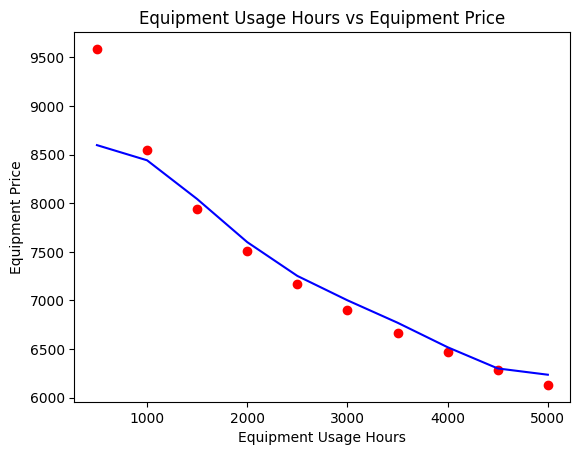

In [18]:
plt.scatter(X, y, color='red')
plt.plot(X, sc_y.inverse_transform(regressor.predict(X_scaled).reshape(-1, 1)), color='blue')
plt.title('Equipment Usage Hours vs Equipment Price')
plt.xlabel('Equipment Usage Hours')
plt.ylabel('Equipment Price')
plt.show()